In [2]:
import seaborn as sb
import pandas as pd
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix


Could not save font_manager cache Lock error: Matplotlib failed to acquire the following lock file:
    C:\Users\ksham\.matplotlib\fontlist-v390.json.matplotlib-lock
This maybe due to another process holding this lock file.  If you are sure no
other Matplotlib process is running, remove this file and try again.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
ds = pd.read_csv(r"C:\Users\ksham\Downloads\creditcard.csv")
ds

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [12]:
ds.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [14]:
ds['Class']

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [16]:
ds['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

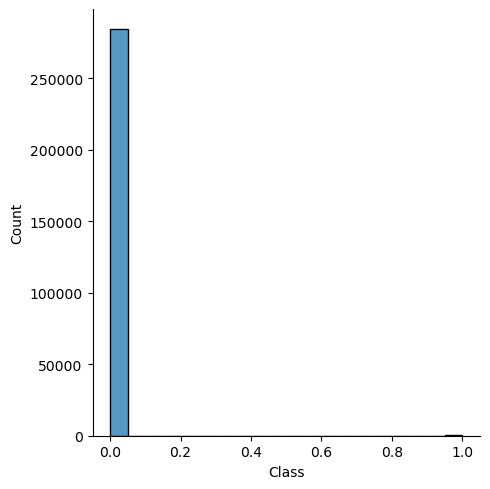

In [18]:
sb.displot(data=ds,x=ds['Class'])

In [20]:
#the dataset is highly imbalanced , convert it 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()



In [22]:
#Converting 1.separate the normal data
normal = ds[ds['Class']==0]
normal

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [24]:
len(normal)

284315

In [30]:
#converting some of the normals into fraudulent
to_convert = int(0.05*284315)
to_convert

14215

In [38]:
#create a list of transactions
list_t = normal.index.tolist()


In [42]:
import random
index_to_convert= random.sample(list_t,to_convert)

In [48]:
ds.loc[index_to_convert,"Class"]=1

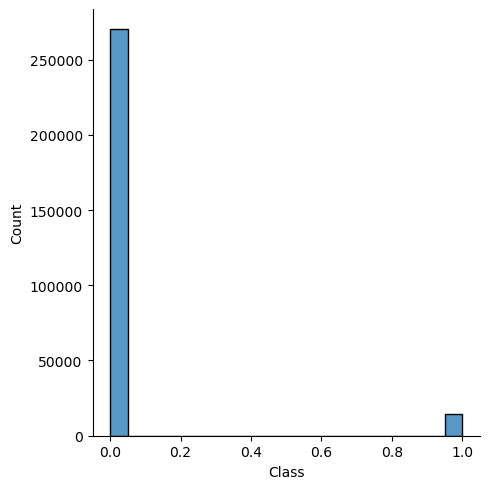

In [50]:
sb.displot(ds,x=ds["Class"])

In [52]:
#scaling time and amount
ds['Time']= sc.fit_transform(ds['Time'].values.reshape(-1,1))
ds['Amount']=sc.fit_transform(ds['Amount'].values.reshape(-1,1))

In [54]:
raw_data=ds.values
labels=raw_data[:,-1]
data=raw_data[:,0:-1]

In [60]:
#train test split on the data
RANDOM_SEED=2021
TEST_PCT=0.3
LABELS=["Normal","Fraud"]
train_data,test_data,train_label,test_label = train_test_split(data,labels,test_size=0.2,random_state=2021)

In [62]:
#normalizing the data min max scaler
min_val= tf.reduce_min(train_data)
max_val= tf.reduce_max(train_data)

In [64]:
train_data=(train_data - min_val)/(max_val - min_val)
test_data= (test_data - min_val)/(max_val - min_val)

In [66]:
train_data= tf.cast(train_data,tf.float32)
test_data=tf.cast(test_data,tf.float32)

In [68]:
train_label = train_label.astype(bool)
test_label = test_label.astype(bool)


In [72]:
n_train_data = train_data[~train_label]
f_train_data = train_data[train_label]
n_test_data= test_data[~test_label]
f_test_data = test_data[test_label]

print(f"No.of normal trian data: {len(n_train_data)}")
print(f"No.of fraud trian data: {len(f_train_data)}")
print(f"No.of normal test data: {len(n_test_data)}")
print(f"No.of fraud test data: {len(f_test_data)}")


No.of normal trian data: 216084
No.of fraud trian data: 11761
No.of normal test data: 54016
No.of fraud test data: 2946


In [74]:
nb_epochs=10
batch_size=64
encoder_dim=14
input_dim=n_train_data.shape[1]
hidden_1=7
hidden_2=4
learning_rate=1e-7

In [78]:
#input layer
input_layer = tf.keras.layers.Input(shape=(input_dim, ))

In [84]:
#creating encoder and decoder 
encoder = tf.keras.layers.Dense(encoder_dim,activation='tanh',activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)
encoder = tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_1,activation='relu')(encoder)
encoder = tf.keras.layers.Dense(hidden_2,activation=tf.nn.leaky_relu)(encoder)

#decoder
decoder = tf.keras.layers.Dense(hidden_1,activation='relu')(encoder)
decoder = tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoder_dim,activation='relu')(decoder)
decoder = tf.keras.layers.Dense(input_dim,activation='tanh')(decoder)
                                

In [88]:
#autoencoder
autoencoder= tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 14)                  │             434 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 14)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 30)                  │             450 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,168 (4.56 KB)

 Trainable params: 1,168 (4.56 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
#compile the model
autoencoder.compile(metrics=['accuracy'],loss='mean_squared_error',optimizer='adam')

In [92]:
history = autoencoder.fit(n_train_data,n_train_data,
                          epochs=5,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(train_data,train_data),
                          verbose=1).history

Epoch 1/5
3377/3377 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.0215 - loss: 0.0229 - val_accuracy: 0.0812 - val_loss: 2.5776e-05
Epoch 2/5
3377/3377 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.0673 - loss: 1.9586e-05 - val_accuracy: 0.0812 - val_loss: 2.1786e-05
Epoch 3/5
3377/3377 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.0689 - loss: 1.9200e-05 - val_accuracy: 0.0812 - val_loss: 2.0985e-05
Epoch 4/5
3377/3377 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.0624 - loss: 1.9350e-05 - val_accuracy: 0.2564 - val_loss: 1.9493e-05
Epoch 5/5
3377/3377 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.1464 - loss: 1.8681e-05 - val_accuracy: 0.1832 - val_loss: 1.8185e-05


Text(0, 0.5, 'Loss')

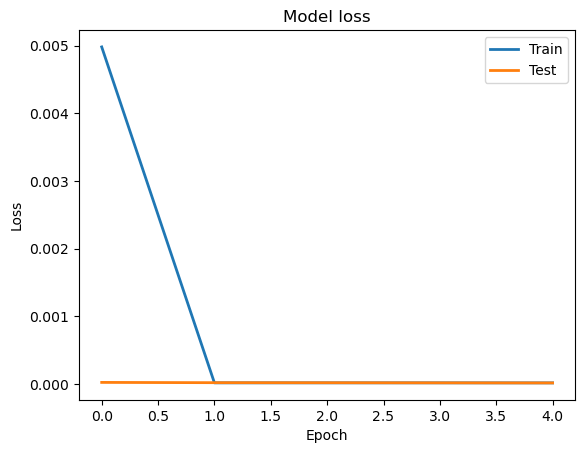

In [104]:
plt.plot(history['loss'],linewidth=2,label="Train")
plt.plot(history['val_loss'],linewidth=2,label="Test")
plt.legend(loc=("upper right"))
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [106]:
prediction = autoencoder.predict(test_data)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [116]:
mse = np.mean(np.power(test_data - prediction,2),axis=1)

In [120]:
#reconstruction loss
mse

array([1.7976050e-05, 1.0854562e-05, 9.7026077e-06, ..., 1.0739216e-05,
       7.3726196e-06, 8.9370978e-06], dtype=float32)

In [144]:
#putting this reconstruction loss into a dataframe
error_ds = pd.DataFrame({'reconstruction_error':mse,'True_Class':test_label})
error_ds

,reconstruction_error,True_Class
0,0.000018,False
1,0.000011,False
2,0.000010,False
3,0.000010,False
4,0.000794,False
...,...,...
56957,0.000009,False
56958,0.000004,False
56959,0.000011,False
56960,0.000007,False


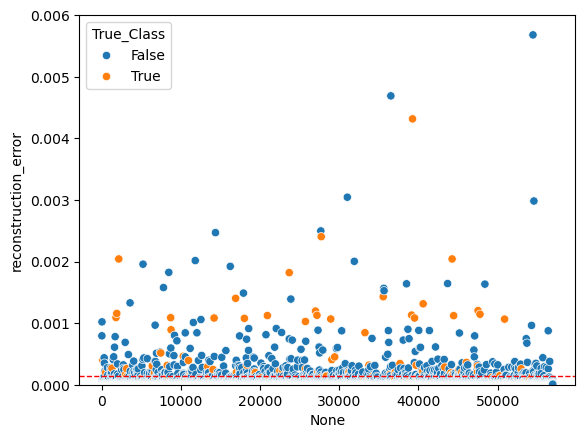

In [158]:
sb.scatterplot(error_ds,x=error_ds.index,y='reconstruction_error',hue='True_Class')
plt.ylim(0,0.006)
plt.axhline(y=0.00014653,color='red',linestyle='--',linewidth=1)

In [160]:
pred_y=[1 if reconstruction_error>0.00014653 else 0 for reconstruction_error in error_ds.reconstruction_error.values]

In [166]:
cm= confusion_matrix(error_ds['True_Class'],pred_y)
cm

array([[53606,   410],
       [ 2876,    70]], dtype=int64)

In [170]:
recall_score(error_ds['True_Class'],pred_y)

0.02376103190767142

In [172]:
precision_score(error_ds['True_Class'],pred_y)

0.14583333333333334

In [174]:
accuracy_score(error_ds['True_Class'],pred_y)

0.9423124188055194